# The Automated Data Analyst: A tool for explainable AI and algorithmic transparency

The Automated Data Analyst (ADAN) is a tool for explainable AI and algorithmic transparency.

Tt provides various functionalities:

1. Equation modelling: This is the core of ADAN. Equation modelling allows you to model relationships between input and output, in a way that it is 100% transparent. This can be used for applications such as discovering biases in the data, or when we need an algorithm which is 100% explainable.

2. Natural language explanation: ADAN can provide high level interpretation of the results.

3. Automated data cleaning: ADAN incorporates various heuristics which automatically clean up and prepare data

4. Auto-ML: This is a secondary functionality of ADAN, which allows the automated analysis of data using ML models.

# Transparent AI

In the example below we will use ADAN's equation modeller in a toy problem. We will try to model the relationship between pollution and deaths in London

In [19]:
import adan
from adan.protocols import run_all,run_automl_models
import warnings
import pandas as pd
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
"""
https://data.london.gov.uk/dataset/estimation-health-impacts-particulate-pollution-london

This is an air pollution dataset used for demo purposes.

We need to remove 2 variables, because they are potential target variables.
"""

path="datatests/data/particulate_air_pollution_mortality/particulate-air-pollution-mortality (1).csv"
df=pd.read_csv(path,encoding='latin1')
df.drop(['Attributable Deaths at coefft (change for 10 µg/m3 PM2.5) 6%',
       'Attributable Deaths at coefft (change for 10 µg/m3 PM2.5) 1%'],axis=1,inplace=True)
    

ADAN is using multiple heuristics to model the dataset. It is primarily based on a genetic programming. Two of the most important parameters is the number of generations and the total population. When we define the population as a list, we end up with multiple populations, which can help stabilise the final solution.

In [3]:
NGEN=20
N_POP=[20,20,20]

In [4]:
df

,Area Code,Area Name,Total Population,PM2.5 Concentration (µg/m3),Attributable Deaths at coefft (change for 10 µg/m3 PM2.5) 12%
0,C000R,Total,7673217,15.34,7965
1,H00AA,City of London,9155,17.59,7
2,00ABFX,Abbey,11558,15.39,15
3,00ABFY,Alibon,9876,14.86,13
4,00ABFZ,Becontree,11716,14.94,15
...,...,...,...,...,...
621,00BKGR,Tachbrook,9533,16.47,8
622,00BKGS,Vincent Square,10567,16.70,9
623,00BKGT,Warwick,8888,16.77,7
624,00BKGU,Westbourne,11562,16.69,9


In [5]:
mortality = run_all(target_name='Attributable Deaths at coefft (change for 10 µg/m3 PM2.5) 12%',\
                      ngen=NGEN,task='regression',path_or_data=df,n_pop=N_POP,
                    test_perc=0.2)
    


EXCESSIVE SKEWNESS DETECTED. USING A LOGARITHM TO FIX IT.
running equation model
Value of PCA criterion is -0.20635198637568342
No feature selection will be performed. The variable to rows ratio is :0.003992015968063872
shape after feature selection: (501, 2)
   	      	                           fitness                            	                      size                     
   	      	--------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max     	min	nevals	std   	avg 	gen	max	min	nevals	std    
0  	20    	-1.14465	0  	0.814412	-2 	20    	1.1877	3.65	0  	11 	2  	20    	2.17428
1  	20    	-0.448132	1  	0.946616	-2 	20    	1.29644	2.7 	1  	4  	2  	20    	0.953939
2  	20    	-0.11965 	2  	0.891712	-2 	20    	1.24317	2.4 	2  	4  	2  	20    	0.734847
3  	18    	0.709768 	3  	0.921655	0.114959	18    	0.1681 	2.25	3  	7  	2  	18    	1.08972 
4  	18    	0.663063 	4  	0.9253  	0       	18    	0.30958	2.05	4  	

15 	18    	0.394588	15 	0.94637 	-2      	18    	1.0087   	2.4 	15 	4  	2  	18    	0.8     
16 	19    	0.801048	16 	0.937551	0       	19    	0.193592 	2.45	16 	5  	2  	19    	0.973396
17 	16    	0.735826	17 	0.927507	0       	16    	0.25455  	2.4 	17 	5  	2  	16    	0.916515
18 	18    	0.402808	18 	0.930815	-2      	18    	1.01104  	2.25	18 	5  	1  	18    	0.829156
19 	16    	0.703776	19 	0.935879	-2      	16    	0.623493 	2.8 	19 	9  	1  	16    	1.8868  
20 	16    	0.679556	20 	0.933331	-2      	16    	0.618468 	2.55	20 	7  	2  	16    	1.49917 
   	      	                            fitness                            	                      size                      
   	      	---------------------------------------------------------------	------------------------------------------------
gen	nevals	avg     	gen	max     	min	nevals	std    	avg	gen	max	min	nevals	std     
0  	0     	0.265952	0  	0.922189	-2 	0     	1.13477	2.5	0  	6  	2  	0     	0.974679
1  	20    	0.773209	1  	0.922369

2  	20    	0.658513	2  	0.958983	-2      	20    	0.63524 	2.35	2  	4  	1  	20    	1.01366
3  	18    	0.675135	3  	0.964664	-2      	18    	0.651989	2.65	3  	4  	1  	18    	0.852936
4  	20    	0.782687	4  	0.953489	0       	20    	0.257597	2.85	4  	4  	1  	20    	0.653835
5  	17    	0.654849	5  	0.966054	0       	17    	0.371079	3.05	5  	4  	2  	17    	0.804674
6  	14    	0.592743	6  	0.966054	-2      	14    	0.667686	2.85	6  	5  	2  	14    	0.90967 
7  	18    	0.453086	7  	0.967635	-2      	18    	0.861668	2.55	7  	3  	2  	18    	0.497494
8  	18    	0.381537	8  	0.964815	-2      	18    	0.868217	2.6 	8  	4  	2  	18    	0.663325
9  	18    	0.626272	9  	0.972391	0       	18    	0.354927	2.55	9  	4  	2  	18    	0.589491
10 	18    	0.527242	10 	0.972391	0       	18    	0.402553	2.75	10 	4  	2  	18    	0.766485
11 	18    	0.799294	11 	0.974103	0.106671	18    	0.242418	2.7 	11 	4  	2  	18    	0.556776
12 	19    	0.755932	12 	0.962357	0       	19    	0.262975	3   	12 	5  	2  	19    	0.774597


3  	18    	0.680405	3  	0.930179	-2 	18    	0.617248	2.5	3  	7  	2  	18    	1.28452 
4  	18    	0.797504	4  	0.893514	0.690574	18    	0.0649867	2  	4  	2  	2  	18    	0       
5  	18    	0.795417	5  	0.926648	0.687445	18    	0.0818625	2  	5  	2  	2  	18    	0       
6  	14    	0.828554	6  	0.920949	0.718274	14    	0.0649723	2  	6  	2  	2  	14    	0       
7  	18    	0.652417	7  	0.917523	-2      	18    	0.611607 	2.05	7  	3  	2  	18    	0.217945
8  	19    	0.501595	8  	0.927165	-2      	19    	0.836752 	2.45	8  	8  	2  	19    	1.43091 
9  	18    	0.531327	9  	0.928979	-2      	18    	0.847117 	2.1 	9  	4  	2  	18    	0.43589 
10 	18    	0.681012	10 	0.928209	-2      	18    	0.618758 	2.3 	10 	6  	2  	18    	0.953939
11 	20    	0.805789	11 	0.898447	0.703132	20    	0.0610096	2   	11 	2  	2  	20    	0       
12 	20    	0.815764	12 	0.920612	0.700992	20    	0.0757629	2   	12 	2  	2  	20    	0       
13 	20    	0.791751	13 	0.899591	0.683821	20    	0.0594433	2   	13 	2  	2  	20    	0      

12 	17    	0.235524	12 	0.951972	-2      	17    	1.11986  	1.6 	12 	8  	1  	17    	1.62481 
13 	19    	0.492753	13 	0.92488 	-2      	19    	0.832449 	1.45	13 	4  	1  	19    	1.07121 
14 	18    	0.67832 	14 	0.925009	-2      	18    	0.617587 	1.45	14 	10 	1  	18    	1.9615  
15 	18    	0.39553 	15 	0.895417	-2      	18    	1.00834  	1.25	15 	6  	1  	18    	1.08972 
16 	18    	0.529704	16 	0.900123	-2      	18    	0.844692 	1.45	16 	10 	1  	18    	1.9615  
17 	20    	0.513447	17 	0.890288	-2      	20    	0.838865 	1.35	17 	6  	1  	20    	1.15217 
18 	20    	0.623329	18 	0.928822	-2      	20    	0.62985  	1.5 	18 	8  	1  	20    	1.62788 
19 	18    	0.691564	19 	0.922415	-2      	18    	0.620674 	1.55	19 	12 	1  	18    	2.39739 
20 	20    	0.809663	20 	0.944674	0.706453	20    	0.0689364	1   	20 	1  	1  	20    	0       
   	      	                            fitness                             	                      size                     
   	      	-------------------------------------

6  	19    	0.383537	6  	0.902411	-2      	19    	1.00305  	1.4 	6  	4  	1  	19    	0.860233
7  	18    	0.247686	7  	0.918452	-2      	18    	1.12544  	1.75	7  	11 	1  	18    	2.29946 
8  	20    	0.79149 	8  	0.921016	0.703412	20    	0.0652564	1.1 	8  	2  	1  	20    	0.3     
9  	18    	0.50671 	9  	0.921016	-2      	18    	0.837494 	1.25	9  	5  	1  	18    	0.887412
10 	14    	0.497942	10 	0.944591	-2      	14    	0.847015 	1.35	10 	6  	1  	14    	1.15217 
11 	18    	0.505257	11 	0.921016	-2      	18    	0.837511 	1.35	11 	6  	1  	18    	1.15217 
12 	14    	0.664377	12 	0.921016	-2      	14    	0.615115 	1.2 	12 	4  	1  	14    	0.678233
13 	20    	0.644566	13 	0.895495	-2      	20    	0.634036 	1.3 	13 	5  	1  	20    	0.953939
14 	20    	0.688342	14 	0.93689 	-2      	20    	0.619555 	1   	14 	1  	1  	20    	0       
15 	20    	0.6597  	15 	0.898056	-2      	20    	0.612943 	1.15	15 	4  	1  	20    	0.653835
16 	18    	0.818228	16 	0.943264	0.692879	18    	0.069274 	1   	16 	1  	1  	18  

17 	18    	0.544608	17 	0.940551	-2      	18    	0.850096 	1.7 	17 	4  	1  	18    	1.22882 
18 	20    	0.814407	18 	0.916834	0.712775	20    	0.0599193	1.45	18 	4  	1  	20    	1.07121 
19 	20    	0.641782	19 	0.88997 	-2      	20    	0.607813 	1.1 	19 	3  	1  	20    	0.43589 
20 	20    	0.809388	20 	0.937249	0.710554	20    	0.0749429	1.2 	20 	5  	1  	20    	0.87178 
   	      	                            fitness                             	                      size                      
   	      	----------------------------------------------------------------	------------------------------------------------
gen	nevals	avg     	gen	max     	min	nevals	std     	avg 	gen	max	min	nevals	std     
0  	0     	0.670794	0  	0.926178	-2 	0     	0.615724	1.05	0  	2  	1  	0     	0.217945
1  	20    	0.36703 	1  	0.896946	-2 	20    	0.995617	1.6 	1  	8  	1  	20    	1.82757 
2  	20    	0.677397	2  	0.942341	-2 	20    	0.618334	1.35	2  	8  	1  	20    	1.52561 
3  	16    	0.832991	3  	0.942341	0.721

15 	17    	0.653303	15 	0.896501	-2      	17    	0.612227 	1.25	15 	3  	1  	17    	0.53619 
16 	20    	0.474044	16 	0.891929	-2      	20    	0.844182 	1.65	16 	9  	1  	20    	1.79652 
17 	18    	0.523066	17 	0.896421	-2      	18    	0.84271  	1.3 	17 	5  	1  	18    	0.953939
18 	18    	0.649374	18 	0.890931	-2      	18    	0.610974 	1.15	18 	4  	1  	18    	0.653835
19 	14    	0.567258	19 	0.943885	-2      	14    	0.857489 	1.15	19 	3  	1  	14    	0.47697 
20 	18    	0.655204	20 	0.924617	-2      	18    	0.612607 	1.05	20 	2  	1  	18    	0.217945
   	      	                            fitness                             	                      size                     
   	      	----------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max     	min	nevals	std     	avg 	gen	max	min	nevals	std    
0  	0     	0.520866	0  	0.943256	-2 	0     	0.841701	1.15	0  	3  	1  	0     	0.47697
1  	20    	0.667249	1  	0.8987

2  	20    	0.753212	2  	0.926324	0  	20    	0.182806	1.1	2  	3  	1  	20    	0.43589
3  	16    	0.792319	3  	0.9271  	0.705608	16    	0.0713675	1  	3  	1  	1  	16    	0      
4  	20    	0.370598	4  	0.95346 	-2      	20    	0.998117 	1.4	4  	5  	1  	20    	1.06771
5  	16    	0.508933	5  	0.95346 	-2      	16    	0.839138 	1.6	5  	13 	1  	16    	2.61534
6  	20    	0.664415	6  	0.952833	-2      	20    	0.612943 	1.35	6  	8  	1  	20    	1.52561
7  	20    	0.657053	7  	0.923306	-2      	20    	0.611817 	1.1 	7  	3  	1  	20    	0.43589
8  	16    	0.497213	8  	0.924685	-2      	16    	0.835293 	1.55	8  	7  	1  	16    	1.53216
9  	16    	0.531702	9  	0.924685	-2      	16    	0.846866 	1.25	9  	3  	1  	16    	0.622495
10 	19    	0.671425	10 	0.919798	-2      	19    	0.616015 	1.3 	10 	7  	1  	19    	1.30767 
11 	20    	0.822578	11 	0.92248 	0.712237	20    	0.0728677	1   	11 	1  	1  	20    	0       
12 	16    	0.545404	12 	0.944264	-2      	16    	0.850853 	1.45	12 	6  	1  	16    	1.35923 
13 	1

11 	16    	0.794273	11 	0.923276	0.705751	16    	0.0650822	1   	11 	1  	1  	16    	0       
12 	16    	0.839997	12 	0.923276	0.722147	16    	0.0544066	1   	12 	1  	1  	16    	0       
13 	20    	0.497827	13 	0.939332	-2      	20    	0.853445 	1.2 	13 	4  	1  	20    	0.678233
14 	17    	0.829662	14 	0.950096	0.70601 	17    	0.0758278	1.05	14 	2  	1  	17    	0.217945
15 	18    	0.388695	15 	0.9496  	-2      	18    	1.00485  	1.55	15 	7  	1  	18    	1.35923 
16 	18    	0.799849	16 	0.9496  	0.579513	18    	0.0857698	1.35	16 	5  	1  	18    	0.90967 
17 	15    	0.800055	17 	0.9496  	0.700038	15    	0.0730544	1.35	17 	2  	1  	15    	0.47697 
18 	16    	0.638544	18 	0.899679	-2      	16    	0.633453 	1.65	18 	6  	1  	16    	1.23592 
19 	20    	0.653255	19 	0.906924	-2      	20    	0.610384 	1.2 	19 	2  	1  	20    	0.4     
20 	18    	0.531883	20 	0.892108	-2      	18    	0.845433 	1.3 	20 	4  	1  	18    	0.714143
   	      	                                 fitness                             

30.861128 - 7.047479*sqrt(log(1/var_Total_Population))


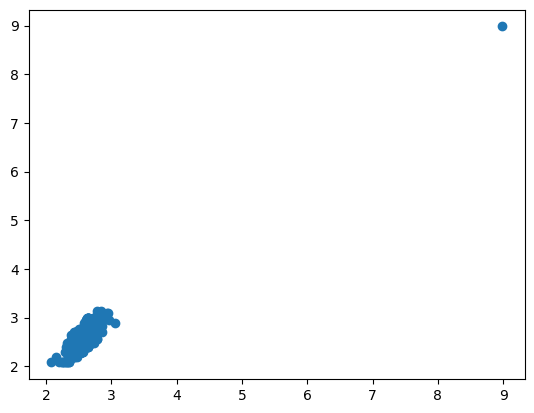

In [6]:
plt.scatter(mortality['predicted_train_values'],mortality['ground_truth_train'])
print(str(mortality['model'].model))

We also see that the performance is reasonably good for the test set

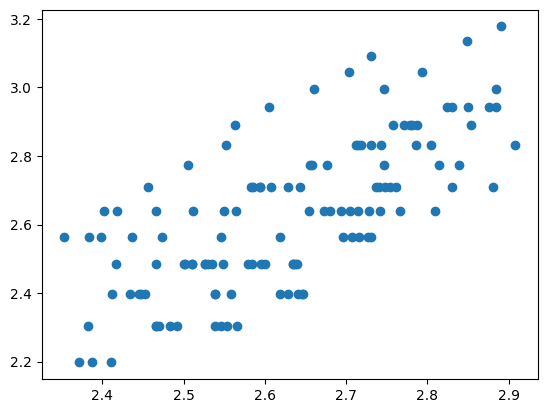

In [16]:
plt.scatter(mortality['predicted_test_values'],mortality['ground_truth_test'])

We see that the model has a good fit. The equation has focused only on the variable total population,and has identified a non-linear relationship between this variable and the target.

Now let's move on to see what other output ADAN can provide to us. The results object is simply a dictionary, and it contains various analyses which we can use to interpret the results.

In [7]:
mortality.keys()

dict_keys(['model', 'other_models', 'most_important_variables', 'detailed_variable_importance_breakdown', 'variable_importance_natural_language', 'general_patterns_rules', 'general_patterns_correlations', 'causal_results_natural_language', 'model_interpretation_natural_language', 'performance_test', 'log_transform_applied_to_target', 'performance_train', 'shapley_summary', 'processed_input_data', 'variable_importance_results_dict', 'results_em_dict', 'successful_execution', 'predicted_train_values', 'predicted_test_values', 'pca_components', 'ground_truth_train', 'ground_truth_test', 'issues_log', 'natural_language_PCA', 'realizer', 'constraints', 'comparison_ml', 'score_ml', 'ml_vs_adan', 'use_test'])

### Natural language explanation of variable importance

In [8]:
print(mortality['variable_importance_natural_language'])


 Variable importance results for "var_Total_Population":
The average importance of the variable is extremely high.
The variable's variance is very low.
The variable's role is very clear (variables without a clear role can have positive and negative contributions at the same time).
The variable has a negative contribution overall.


The most important variable is var_Total_Population.
The variable with the most positive contribution is none.
The variable with the most negative contribution is var_Total_Population.



### Identified rules

In this case, we end with a single rule, since the dataset is quite simple

In [10]:
mortality['general_patterns_rules']

,support,itemsets,length
0,0.65655,"(PM2.5 Concentration (µg/m3)_(14.357, 15.477],...",3


### Benchmark comparison against an ML model

In [17]:
mortality['general_patterns_correlations']

Total Population  Attributable Deaths at coefft (change for 10 µg/m3 PM2.5) 12%    0.761443
dtype: float64

# AutoML

Now, let's see how we can do AutoML in ADAN

In [20]:
df=pd.read_csv('datatests/data/churn_data/churn.csv')
df=df.sample(frac=0.2)

cats=['product_id','postcode','partner_name','merchant_name','manufacturer','model',
      'product_coverage', 'contract_type_group','device_category','condition','color']

for cat in cats:
    df[cat]=df[cat].astype('category')


feats=run_automl_models(df,'cancel_target','classification',num_iterations=3)

Value of PCA criterion is -0.07629557796852551
iterating...
[LightGBM] [Warning] bagging_freq is set=143, subsample_freq=0 will be ignored. Current value: bagging_freq=143
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] lambda_l1 is set=0.05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05
[LightGBM] [Warning] lambda_l2 is set=0.55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.55
[LightGBM] [Warning] bagging_freq is set=143, subsample_freq=0 will be ignored. Current value: bagging_freq=143
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] lambda_l1 is set=0.05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05
[LightGBM] [Warning] lambda_l2 is set=0.55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.55
[LightGBM] [Warning] bagging_freq is set=143, subsample_freq=0 will be ignored. Curren

In [21]:
feats

{'percentage_contribution': var_Description            0.018499
 var_Median                 0.020131
 var_Mean                   0.019416
 var_postcode               0.025795
 var_partner_id             0.038333
 var_Gender                 0.028224
 var_partner_name           0.027233
 var_merchant_name          0.018413
 var_month                  0.021974
 var_create_date_indays     0.344729
 var_device_price           0.035580
 var_manufacturer           0.007578
 var_model                  0.002038
 var_model_id               0.180218
 var_condition              0.000157
 var_color                  0.003605
 var_memory_gb              0.005658
 var_product_id             0.162259
 var_product_coverage       0.004245
 var_contract_type_group    0.000000
 var_total_payable          0.009169
 var_monthly_premium        0.016678
 var_installments           0.000000
 var_device_category        0.001777
 var_number_of_claims       0.006166
 var_claim_profile          0.002126
 dtype: flo